<a href="https://colab.research.google.com/github/Thuan20146215/AI/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Food_Img/train', 
                                                 target_size = (280,180), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 107 images belonging to 5 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Food_Img/test', 
                                                
                                                 target_size = (280,180), 
                                                 batch_size = 32, 
                                                class_mode = 'categorical')

Found 5 images belonging to 5 classes.


**TẠO** **MODEL**

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

In [14]:
# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[280,180,3],padding='same')) #3 kênh màu RGB
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 280, 180, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 280, 180, 32)      9248      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 280, 180, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 140, 90, 32)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 140, 90, 64)       18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 140, 90, 64)       36928     
                                                      

In [16]:
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])
a = model.fit_generator( training_set, validation_data=test_set, epochs=20, steps_per_epoch=len(training_set), 
                        validation_steps=len(test_set)
)

<ipython-input-16-08f6c43e744f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, validation_data=test_set, epochs=20, steps_per_epoch=len(training_set),


Epoch 1/20
4/4 [==============================] - 51s 11s/step - loss: 0.3393 - accuracy: 0.9252 - val_loss: 0.5411 - val_accuracy: 0.8000
Epoch 2/20
4/4 [==============================] - 44s 13s/step - loss: 0.3330 - accuracy: 0.8785 - val_loss: 3.0085 - val_accuracy: 0.8000
Epoch 3/20
4/4 [==============================] - 44s 10s/step - loss: 0.1075 - accuracy: 0.9720 - val_loss: 1.6357 - val_accuracy: 0.2000
Epoch 4/20
4/4 [==============================] - 45s 11s/step - loss: 0.0689 - accuracy: 0.9813 - val_loss: 0.9798 - val_accuracy: 0.6000
Epoch 5/20
4/4 [==============================] - 44s 11s/step - loss: 0.0924 - accuracy: 0.9720 - val_loss: 1.5562 - val_accuracy: 0.6000
Epoch 6/20
4/4 [==============================] - 45s 10s/step - loss: 0.0852 - accuracy: 0.9813 - val_loss: 0.3642 - val_accuracy: 0.8000
Epoch 7/20
4/4 [==============================] - 44s 10s/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 3.9645 - val_accuracy: 0.6000
Epoch 8/20
4/4 [===========

In [17]:
model.evaluate(test_set)

1/1 [==============================] - 1s 1s/step - loss: 0.3110 - accuracy: 0.8000


[0.3109702169895172, 0.800000011920929]

In [18]:
y_pred = model.predict_generator(test_set)
y_pred_class = y_pred > 0.5
y_pred_class

<ipython-input-18-467eccc537b7>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_set)


array([[False, False,  True, False, False],
       [ True, False, False, False, False],
       [False, False, False,  True, False],
       [False,  True, False, False, False],
       [False, False, False, False,  True]])

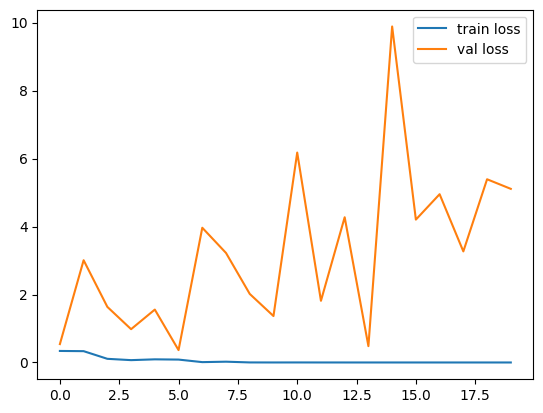

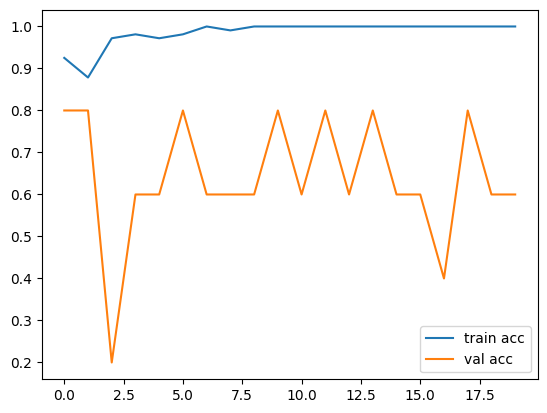

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')

plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('accval_acc')

In [22]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Food_Img/model_food.h5')

In [23]:
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/Food_Img/model_food.h5')

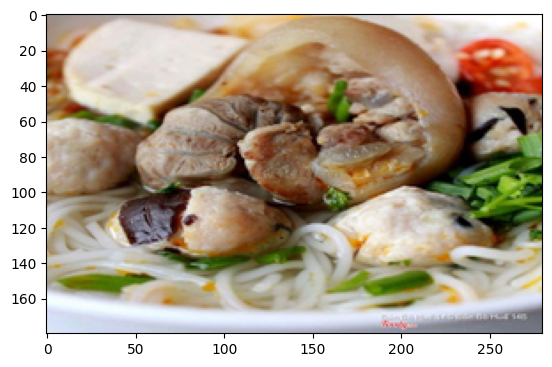

In [24]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical, load_img, img_to_array
img_data = load_img('/content/drive/MyDrive/Food_Img/run/r5.jpg')
img_data = img_to_array(img_data)
plt.imshow(img_data/255)

In [25]:
training_set.class_indices

{'Banhxeo': 0, 'Bunbo': 1, 'Bundau': 2, 'Bunthitnuong': 3, 'Pho': 4}

Chọn ảnh : r3
1/1 [==============================] - 0s 124ms/step
[[0. 0. 1. 0. 0.]]
Bún Đậu Mắm Tôm
Chọn ảnh : r7
1/1 [==============================] - 0s 178ms/step
[[0. 0. 0. 1. 0.]]
Bún Thịt Nướng
Chọn ảnh : t2
Không tìm thấy ảnh có tên tương ứng 
Chọn ảnh : r2
1/1 [==============================] - 0s 103ms/step
[[0. 0. 0. 0. 1.]]
Phở
Chọn ảnh : r1
1/1 [==============================] - 0s 106ms/step
[[0. 0. 0. 0. 1.]]
Phở


KeyboardInterrupt: ignored

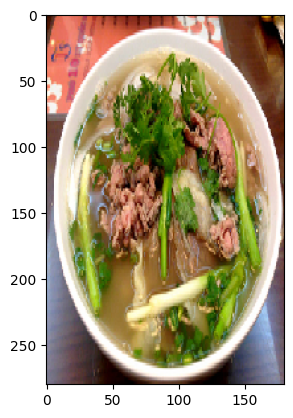

In [27]:
import numpy as np
from keras.preprocessing import image
while 1 :
 ch = input('Chọn' ' ảnh : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/Food_Img/run/{}.jpg".format(ch),
                             target_size=(280,180)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     x=0
     c=0
     i=0
     while (i<5):
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x==0 and c==4) :
         c=5
     if c == 0:
       prediction = 'Bánh Xèo'
     elif c == 1:
       prediction = 'Bún Bò'
     elif c == 2:
       prediction = 'Bún Đậu Mắm Tôm'
     elif c == 3:
       prediction = 'Bún Thịt Nướng'
     elif c == 4:
       prediction = 'Phở'      
     print(prediction)
   except:
      print('Không tìm thấy ảnh có tên tương ứng '  )